In [ ]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 17.2MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 1.2MB 52.1MB/s 
     |████████████████████████████████| 194kB 57.3MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 


In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *
import pandas as pd
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
path_root = '/gdrive/My Drive/Colab Notebooks/Pictures/dataset/'
fns = get_image_files(path_root)

In [ ]:
masks = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label
    )

# Transforming the images

By default Resize crops the images to fit a square shape of the size requested, using the full width or height. This can result in losing some important details. Alternatively, you can ask fastai to pad the images with zeros (black), or squish/stretch them:

**bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish)**

**bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))** 

Here's another example where we replace Resize with RandomResizedCrop, which is the transform that crop the images then remove some of the features that allow us to perform recognition

**bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))**

Data augmentation refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data.

**bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))**

Then : 
dls = bears.dataloaders(path)


We can create another datablock object and make datablock object which is an identical copy of an existing datablock object and change only few pieces. For this we use .new

In [ ]:
masks = masks.new(
  item_tfms=RandomResizedCrop(128, min_scale=0.3),
  batch_tfms=aug_transforms(mult=2)  
)
dls = masks.dataloaders(path_root)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate, path = '/gdrive/My Drive/Colab Notebooks')

In [ ]:
learn.fit(n_epoch=10, cbs=SaveModelCallback(fname = 'mask_model'))

epoch,train_loss,valid_loss,error_rate,time
0,0.073054,0.163285,0.048583,00:06
1,0.062285,0.165912,0.052632,00:06
2,0.060089,0.146075,0.056680,00:06
3,0.052106,0.118939,0.036437,00:06
4,0.050322,0.102700,0.036437,00:06
5,0.056225,0.166998,0.048583,00:06
6,0.051676,0.169757,0.060729,00:06
7,0.044708,0.148291,0.060729,00:06
8,0.051380,0.147817,0.060729,00:06
9,0.048905,0.189180,0.064777,00:06


Better model found at epoch 0 with valid_loss value: 0.1632852852344513.
Better model found at epoch 2 with valid_loss value: 0.14607498049736023.
Better model found at epoch 3 with valid_loss value: 0.11893913894891739.
Better model found at epoch 4 with valid_loss value: 0.10270021110773087.


In [ ]:
learn.load('mask_model')
learn.export('mask_model.pkl')

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


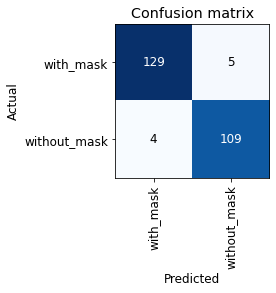

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
model_imported = load_learner('/gdrive/My Drive/Colab Notebooks/mask_model.pkl')

In [ ]:
model_imported.predict('/gdrive/My Drive/Colab Notebooks/Pictures/train/Image_1.jpg')

('without_mask', tensor(1), tensor([0.0044, 0.9956]))

In [ ]:
model_imported.dls.vocab

['with_mask', 'without_mask']

In [ ]:
import PIL
import numpy as np
from ipywidgets import *
import ipywidgets as widgets

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = model_imported.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: with_mask; Probability: 0.9999')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = model_imported.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])